In [1]:
%run "..\Startup_py3.py"
sys.path.append(r"..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

8628


In [2]:
ref_data_folder = r'\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0'
ref_dax_files =[os.path.join(ref_data_folder, _fl) for _fl in os.listdir(ref_data_folder) if _fl.split(os.extsep)[-1] == 'dax']

data_folder = r'\\10.245.74.158\Chromatin_NAS_4\20210426-P_Forebrain_CTP09_from0423RNA\H57R57'
dax_files =[os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) if _fl.split(os.extsep)[-1] == 'dax']

In [3]:
correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210501-Corrections_2color_40'

In [4]:
print(dax_files[1])
print(ref_dax_files[1])

\\10.245.74.158\Chromatin_NAS_4\20210426-P_Forebrain_CTP09_from0423RNA\H57R57\Conv_zscan_065.dax
\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_065.dax


In [5]:
ims, fucs, drift = io_tools.load.correct_fov_image(dax_files[1], [647, 488],
                                                   all_channels=[750, 647, 488, 405],
                                                   warp_image=False, return_drift=True,
                                                   single_im_size=[40,2048,2048],
                                                   correction_folder=correction_folder, 
                                                   bleed_corr=False,
                                                   chromatic_corr=False,
                                                   calculate_drift=True, ref_filename=ref_dax_files[1],
                                                   )

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_4\20210426-P_Forebrain_CTP09_from0423RNA\H57R57\Conv_zscan_065.dax
-- loading illumination correction profile from file:
	 647 illumination_correction_647_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_4\20210426-P_Forebrain_CTP09_from0423RNA\H57R57\Conv_zscan_065.dax  in 3.762s
-- removing hot pixels for channels:['647', '488'] in 21.167s
-- illumination correction for channels: 647, 488, in 3.984s
-- apply bead_drift calculate for channel: 488
-- aligning image to H0R0 Conv_zscan_065.dax -> directly use image
--- finish drift in 97.513s
-- drift: [-0.06 -2.48  4.39]
-- -- generate translation function with drift:[-0.06 -2.48  4.39] in 0.000s
-- finish correction in 127.434s


In [6]:
ref_ims, = io_tools.load.correct_fov_image(ref_dax_files[1], [488],
                                           all_channels=[750, 647, 488, 405],
                                           warp_image=True, drift=-drift,
                                           return_drift=False,
                                           single_im_size=[40,2048,2048],
                                           correction_folder=correction_folder, 
                                           bleed_corr=False,
                                           chromatic_corr=False,
                                           calculate_drift=False, #ref_filename=dax_files[1],
                                           )

- correct the whole fov for image: \\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_065.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.212\Chromatin_NAS_3\20210426-P_Forebrain_CTP09_from0423RNA\H0R0\Conv_zscan_065.dax  in 2.701s
-- removing hot pixels for channels:['488'] in 10.405s
-- illumination correction for channels: 488, in 2.019s
-- warp image with drift:[ 0.06  2.48 -4.39] 488, in 89.381s
-- finish correction in 105.004s


<IPython.core.display.Javascript object>


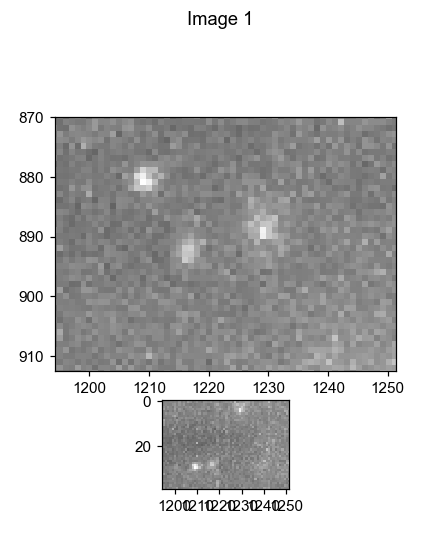

In [9]:
visual_tools.imshow_mark_3d_v2([ims[-1], ref_ims[-1]])